In [7]:
import pandas as pd
import numpy as np
import joblib
from plotnine import *

from prophet import Prophet # conda install -c conda-forge prophet

ModuleNotFoundError: No module named 'prophet'

# Data Loading

In [3]:
## Raw Data
df=joblib.load('/home/ubuntu/Python_Projects/Stock_Price_Prediction/data/stock_price_2020_2021.pkl')
print(df.shape)
print(df.Date.min(),df.Date.max())
print(df.REFRESH_DATE.min())
print(df.Stock.nunique())
print(df.dtypes)

(2178988, 9)
2020-01-02 00:00:00 2021-09-14 00:00:00
2021-08-15 00:00:00
5991
Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Volume                 float64
SE                      object
Stock                   object
REFRESH_DATE    datetime64[ns]
dtype: object


In [4]:
df.head(5)

,Date,Open,High,Low,Close,Volume,SE,Stock,REFRESH_DATE
0,2020-01-02,1.35,1.38,1.35,1.35,4300.0,NASDAQ,AACG,2021-08-15
1,2020-01-03,1.36,1.49,1.36,1.47,42000.0,NASDAQ,AACG,2021-08-15
2,2020-01-06,1.51,1.51,1.36,1.43,18700.0,NASDAQ,AACG,2021-08-15
3,2020-01-07,1.39,1.44,1.36,1.43,13700.0,NASDAQ,AACG,2021-08-15
4,2020-01-08,1.41,1.58,1.36,1.51,90900.0,NASDAQ,AACG,2021-08-15


# Initial Modeling 

## 01 LOGI 

### Data Review 

In [6]:
df_LOGI=df.loc[df.Stock=='LOGI',:].reset_index(drop=True)
print(df_LOGI.shape)
df_LOGI

(424, 9)


,Date,Open,High,Low,Close,Volume,SE,Stock,REFRESH_DATE
0,2020-01-02,46.762743,47.108404,46.673859,47.078773,176400.0,NASDAQ,LOGI,2021-08-15 00:00:00
1,2020-01-03,46.644234,46.940512,46.446713,46.624481,254000.0,NASDAQ,LOGI,2021-08-15 00:00:00
2,2020-01-06,46.170185,46.644232,46.110928,46.594852,164200.0,NASDAQ,LOGI,2021-08-15 00:00:00
3,2020-01-07,46.822002,46.861507,46.604729,46.723244,95200.0,NASDAQ,LOGI,2021-08-15 00:00:00
4,2020-01-08,46.970143,47.207164,46.782497,47.029396,142300.0,NASDAQ,LOGI,2021-08-15 00:00:00
...,...,...,...,...,...,...,...,...,...
419,2021-08-31,103.620003,103.989998,102.019997,102.349998,88730000.0,NASDAQ,LOGI,2021-09-07 23:38:19
420,2021-09-01,103.440002,104.529999,103.129997,103.430000,59750000.0,NASDAQ,LOGI,2021-09-07 23:38:19
421,2021-09-02,102.919998,103.070000,101.089996,101.230003,61780000.0,NASDAQ,LOGI,2021-09-07 23:38:19
422,2021-09-03,102.870003,103.459999,102.470001,102.870003,46800000.0,NASDAQ,LOGI,2021-09-07 23:38:19


/home/ubuntu/anaconda3/lib/python3.7/site-packages/plotnine/stats/smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)


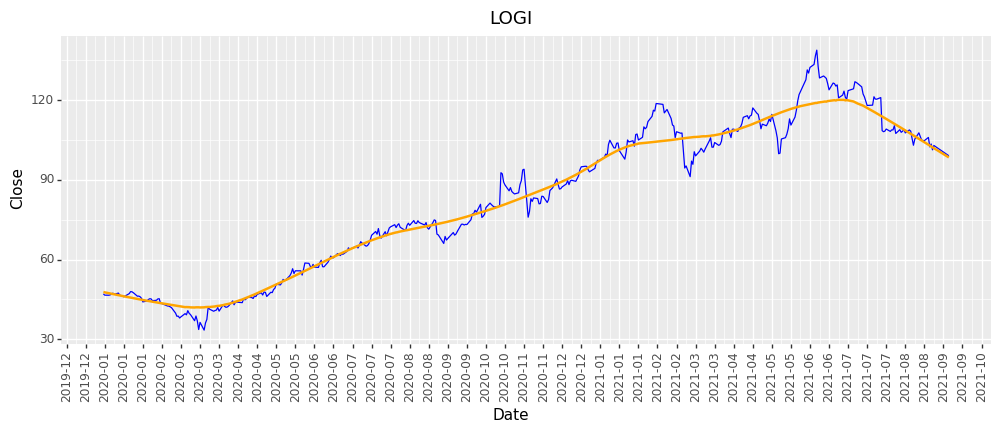

<ggplot: (8784580801569)>


In [12]:
## Viz
print(
    ggplot(aes('Date','Close'),df_LOGI)
    +geom_line(color='blue')
    +scale_x_datetime(date_breaks='14 days',date_labels='%Y-%m')
    +geom_smooth(span=0.2,color='orange',alpha=0.5)
    +labs(title='LOGI')
    +theme(axis_text_x=element_text(angle=90),figure_size=(12,4))
)

### Modeling 

In [14]:
df_LOGI_2=df_LOGI.loc[:,['Date','Close','Stock']].rename(columns={'Date':'ds',
                                                                  'Close':'y'
                                                                 })
df_LOGI_2

,ds,y,Stock
0,2020-01-02,47.078773,LOGI
1,2020-01-03,46.624481,LOGI
2,2020-01-06,46.594852,LOGI
3,2020-01-07,46.723244,LOGI
4,2020-01-08,47.029396,LOGI
...,...,...,...
419,2021-08-31,102.349998,LOGI
420,2021-09-01,103.430000,LOGI
421,2021-09-02,101.230003,LOGI
422,2021-09-03,102.870003,LOGI


In [15]:
## Initializing
LOGI_m=Prophet()
LOGI_m.fit(df_LOGI_2)

NameError: name 'Prophet' is not defined